In [1]:
#Para esta actividad se importarán las siguientes librerías:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
#Importando las librerías para el ejemplo 
import matplotlib.pyplot as plt #Importando  matplotlib
import numpy as np #Importando numoy
import seaborn as sns #Importando seaborn

#Importando dataset que se van a usar
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

#Para poder realizar la normalización media se debe de importar el escalador
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
#Código para cargar el Dataset
enfermedadesCardiovascular= pd.read_csv('cardio_train.csv',sep=";")
enfermedadesCardiovascular.head() #presentando dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Limpieza de datos

In [3]:
#Reduciendo registros de dataset para pasar de 70000 a 3000
datasetReducido=enfermedadesCardiovascular[53000:56000]
datasetReducido.head() #Los registros serán escogidos aleatoriamente

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
53000,75599,17482,2,172,76.0,110,70,1,1,0,1,1,1
53001,75601,18358,1,161,62.0,120,80,1,1,0,0,1,0
53002,75602,22448,1,144,63.0,140,90,1,1,0,0,1,1
53003,75603,16811,1,165,67.0,160,90,2,2,0,0,1,0
53004,75604,23531,1,170,65.0,110,80,1,1,0,0,1,1


In [10]:
"""Separando las características de entrada y salida"""
X=datasetReducido[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]
y=datasetReducido[['cardio']]

In [11]:
"""Identificando si existen valores nulos en la variable objetivo"""
y.isnull().sum()

cardio    0
dtype: int64

In [12]:
"""Identificando si existen valores nulos en las variables de entrada"""
X.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

# Descripción de la fuente del Dataset

El dataset con el que se va a trabajar contiene 70000 registros, el cual se lo transformo a 3000 reigstros. Los registros serán sobre personas con enfermedad cardiovascular. Contiene características que ayuda a predicir si una persona tiene o no enfermedad cardiovascular. Entre las características de entrada se encuentran las siguientes:

Id: Id de la persona (int).

Age: La edad (int).

Gender: El género 1 para mujer y 2 para hombre.

Height: Altura (cm).

Weight: El peso (kg).

ap_hi: Presión sanguínea sistólica (int).

ap_lo: Presión arterial diastólica.

cholesterol: El colesterol por niveles, 1: normal, 2: por encima de lo normal, 3: muy por
encima de lo normal.

gluc: La glucosa por niveles, 1: normal, 2: por encima de lo normal, 3: muy por encima de lo
normal.

smoke: Si el paciente fuma o no, 0 para no y 1 para si.

alco: Si el paciente toma alcohol, 0 para no y 1 para si.

active: Si el paciente tiene actividad física, 0 para no y 1 para si.

In [4]:
#describiendo las caracteristicas anteriormente mencionadas
enfermedadesCardiovascular.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Problema a resolver

Como se ha mencionado el problema identificado es predicir si una personas tienen o no una enfermedad cardiovascular. Para ello en su variable objetivo que es Cardio se identifica con 1 a las personas con enfermedad cardiovascular. Mientras que, 0 a las personas que no tienen enfermedad cardiovascular. Entre las variables objetivos están: Id,
Age
Gender
Height
Weight 
ap_hi
ap_lo 
cholesterol 
gluc
smoke 
alco 
active 

# Caracterización del Dataset

In [14]:
#Número de instancias en total.
datasetReducido.count()

id             3000
age            3000
gender         3000
height         3000
weight         3000
ap_hi          3000
ap_lo          3000
cholesterol    3000
gluc           3000
smoke          3000
alco           3000
active         3000
cardio         3000
dtype: int64

In [15]:
#Número de atributos de entrada, su significado y tipo.
datasetReducido.drop('cardio', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 39585 to 38970
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3000 non-null   int64  
 1   age          3000 non-null   int64  
 2   gender       3000 non-null   int64  
 3   height       3000 non-null   int64  
 4   weight       3000 non-null   float64
 5   ap_hi        3000 non-null   int64  
 6   ap_lo        3000 non-null   int64  
 7   cholesterol  3000 non-null   int64  
 8   gluc         3000 non-null   int64  
 9   smoke        3000 non-null   int64  
 10  alco         3000 non-null   int64  
 11  active       3000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 304.7 KB


In [16]:
#AQUI TOCA HACER ALGO MAAASSSSSS 

# Variables de entrenamiento y prueba

In [16]:
"""Variables de entrada y variable objetivo"""
VariableObjetivo=['cardio']
VariablesEntrada=['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']

In [17]:
"""Dividiendo para prepar las variables de entrenamiento y prueba"""
x=datasetReducido[VariablesEntrada].values
y=datasetReducido[VariableObjetivo].values

In [18]:
"""Declarando las variables de entrenamiento y prueba"""
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Estanderizando

# Naive Bayes

In [37]:
"""Importando las librerias necesarias que se usan para el modelo"""
import pandas as pd
import matplotlib.pyplot as pit
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
"""Dividiendo para prepar las variables de entrenamiento y prueba"""
x=datasetReducido.drop(['cardio'],axis=1)
y=datasetReducido.cardio

In [22]:
"""Declarando las variables de entrenamiento y prueba"""
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [27]:
"""Estanderizando escalas"""
estanderizar=StandardScaler()
x_train=estanderizar.fit_transform(X_train)
x_test=estanderizar.transform(X_test)

In [29]:
"""Algoritmo de Naive Bayes"""
clasificador=GaussianNB()
clasificador.fit(X_train,y_train)

GaussianNB()

In [33]:
"""Predicción"""
y_prediccion=clasificador.predict(X_test)

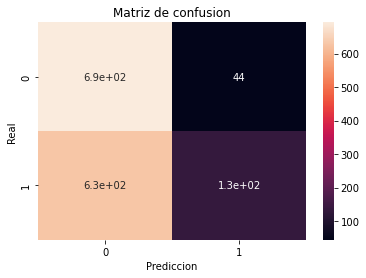

In [36]:
"""Creando matriz de confusion"""
MConfusion=confusion_matrix(y_test,y_prediccion)
sns.heatmap(MConfusion,annot=True)
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusion")
plt.show()

In [38]:
"""Accuracy del modelo"""
accuracy_score(y_test,y_prediccion)

0.5513333333333333